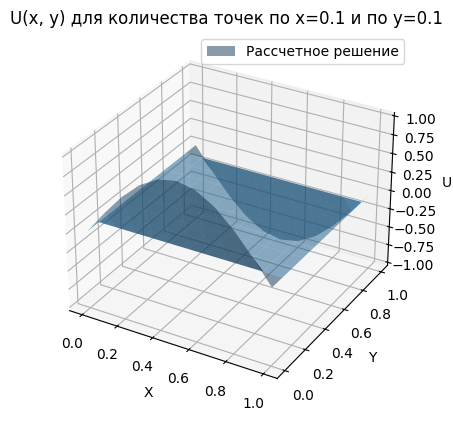

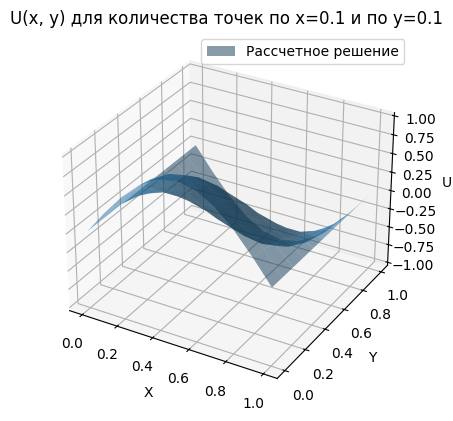

[[-6.57092208e+13 -6.57092208e+13 -6.57092208e+13 -6.57092208e+13
  -6.57092208e+13 -6.57092208e+13 -6.57092208e+13 -6.57092208e+13
  -6.57092208e+13 -6.57092208e+13 -6.57092208e+13]
 [-6.57092208e+13 -6.57092208e+13 -6.57092208e+13 -6.57092208e+13
  -6.57092208e+13 -6.57092208e+13 -6.57092208e+13 -6.57092208e+13
  -6.57092208e+13 -6.57092208e+13 -6.57092208e+13]
 [-6.57092208e+13 -6.57092208e+13 -6.57092208e+13 -6.57092208e+13
  -6.57092208e+13 -6.57092208e+13 -6.57092208e+13 -6.57092208e+13
  -6.57092208e+13 -6.57092208e+13 -6.57092208e+13]
 [-6.57092208e+13 -6.57092208e+13 -6.57092208e+13 -6.57092208e+13
  -6.57092208e+13 -6.57092208e+13 -6.57092208e+13 -6.57092208e+13
  -6.57092208e+13 -6.57092208e+13 -6.57092208e+13]
 [-6.57092208e+13 -6.57092208e+13 -6.57092208e+13 -6.57092208e+13
  -6.57092208e+13 -6.57092208e+13 -6.57092208e+13 -6.57092208e+13
  -6.57092208e+13 -6.57092208e+13 -6.57092208e+13]
 [-6.57092208e+13 -6.57092208e+13 -6.57092208e+13 -6.57092208e+13
  -6.57092208e+13 -

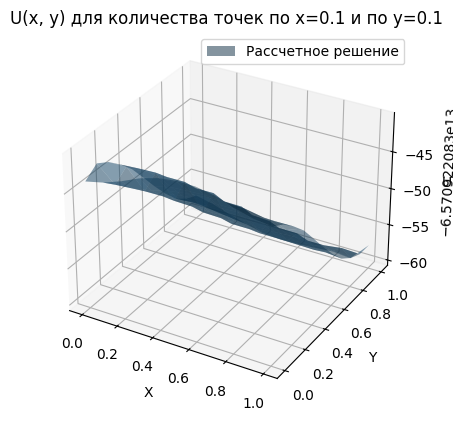

<Axes: >

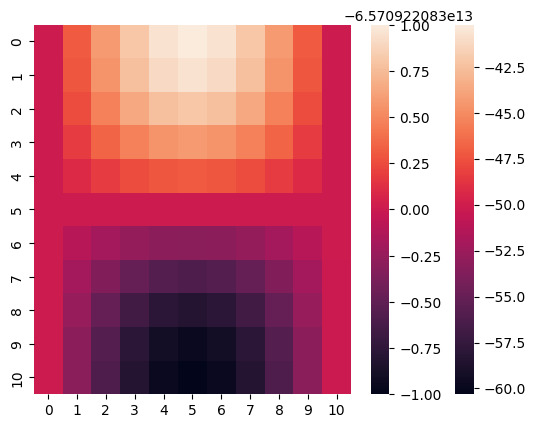

In [4]:
# Created by Hannah at 11.12.2023 19:43
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def u_analytics(x, y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)


def show_u(x, y, u):
    plt.plot(x, y, label=f'y, num of steps={len(x)}')
    plt.xlabel('x')
    plt.ylabel('U(x)')
    plt.legend()
    plt.title(f'Решение')
    plt.show()
    return


def show_s_res(x, u1, u2):
    plt.plot(x, u1, label='u_a')
    plt.plot(x, u2, label='u_p')
    plt.xlabel('x')
    plt.ylabel('U(x, 1)')
    plt.legend()
    plt.title(f'Последний слои рассчетного решения ')
    plt.show()
    return


def show_graph(x_a, y_a, z_a, z_p):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    #ax.plot_surface(x_a, y_a, z_a, label='Аналитическое решение')
    ax.plot_surface(x_a, y_a, z_p, label='Рассчетное решение', alpha=0.5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('U')
    plt.legend()
    plt.title(f'U(x, y) для количества точек по x={int(1/(len(x_a) - 1)*10000)/10000} и по y={int(1/(len(y_a) - 1)*10000)/10000}')
    plt.show()
    return


def u_practice(x, y):
    y_size = y.size
    x_size = x.size
    u = np.zeros((x_size, y_size))

    d = 50
    # граничные условия при фикс х Дирихле(Нейман)
    for y_i in range(y_size):
        u[0, y_i] = 0
        u[-1, y_i] = 0
        # u[0, y_i] = -1 * np.pi * np.cos(np.pi * y[y_i])
        # u[-1, y_i] = 1 * np.pi * np.cos(np.pi * y[y_i])

    # граничные условия при фикс y (Дирихле)

    for x_i in range(x_size):
        u[x_i, 0] = np.sin(np.pi * x[x_i]) * 1
        u[x_i, -1] = np.sin(np.pi * x[x_i]) * -1

    # for x_i in range(1, x_size-1):
    #     for y_i in range(1, y_size - 1):
    #         u[x_i, y_i] = -2
    return u


def countR(Nx, Ny, x, y, hx, hy):
    d = 1
    R = np.zeros([(Nx+1)*(Ny+1)])
    for i in range(1, Nx - 1):
        for j in range(1, Ny-1):
            R[i*Ny+j] = (1+d)/(hx * hy * np.pi**2)*(2 * np.cos(y[j] * np.pi) - np.cos(y[j+1] * np.pi) - np.cos(y[j-1] * np.pi) - np.pi * (y[j+1] - 2 * y[j] + y[j-1]) * np.sin(y[j] * np.pi))\
            * (2 * np.sin(x[i] * np.pi) - np.sin(x[i+1] * np.pi) - np.sin(x[i-1] * np.pi) + np.pi * (x[i+1] - 2 * x[i] + x[i-1])*np.cos(x[i] * np.pi))
    return R


def countM(h, t, x, y):
    hx = 1/(h - 1)
    Nx=int(1/hx)
    hy = 1/(t - 1)
    Ny=int(1/hy)
    d = 1
    Igik = np.zeros([Nx+1,Ny+1])
    Igjl = np.zeros([Nx+1,Ny+1])
    Iik = np.zeros([Nx+1,Ny+1])
    Ijl = np.zeros([Nx+1,Ny+1])
    M = np.zeros([(Nx+1)*(Ny+1),(Nx+1)*(Ny+1)])

    for i in range(Nx+1):
      for j in range(Ny+1):
        for k in range(Nx+1):
          for l in range(Ny+1):
            Igik[i][k] = ((1/hx)*((2 - (1 if(i==0) else 0)-(1 if(i==Nx) else 0))*(1 if(i==k) else 0) - ((1 if(i==k+1) else 0)+(1 if(i==k-1) else 0))))
            Igjl[j][l] = ((1/hy)*((2 - (1 if(j==0) else 0)-(1 if(j==Ny) else 0))*(1 if(j==l) else 0) - ((1 if(j==l+1) else 0)+(1 if(j==l-1) else 0))))
            Iik[i][k] = ((hx/6)*(2*(2 - (1 if(i==0) else 0)-(1 if(i==Nx) else 0))*(1 if(i==k) else 0) - ((1 if(i==k+1) else 0)+(1 if(i==k-1) else 0))))
            Ijl[j][l] = ((hy/6)*(2*(2 - (1 if(j==0) else 0)-(1 if(j==Ny) else 0))*(1 if(j==l) else 0) - ((1 if(j==l+1) else 0)+(1 if(j==l-1) else 0))))

            M[i*(Ny+1)+j][k*(Ny+1)+l] = Igik[i][k]*Ijl[j][l]+d*Igjl[j][l]*Iik[i][k]

    R = countR(Nx, Ny, x, y, hx, hy)
    for i in range(Nx):
        R[i] = np.sin(np.pi * x[i]) * 1
        R[Nx * Ny + i] = np.sin(np.pi * x[i]) * -1

    #print(M)
    #print(R)
    C = np.dot(np.linalg.inv(M), R)

    C_kv = np.zeros([Nx+1, Ny+1])
    for i in range(Nx+1):
        for j in range(Ny+1):
            C_kv[i, j] = (C[i*Ny + j])

    print(C_kv)
    #sns.heatmap(M)
    return M, R, C_kv


h_x_kol = 11
h_y_kol = 11
x = np.linspace(0, 1, h_x_kol)
y = np.linspace(0, 1, h_y_kol)
X, Y = np.meshgrid(x, y)
u_a = u_analytics(X, Y)
u_p = u_practice(x, y)
u_p = u_p.transpose()

show_graph(X, Y, u_a, u_p)

show_graph(X, Y, u_p, u_a)

M, R, C_kv = countM(h_y_kol, h_y_kol, x, y)

show_graph(X, Y, u_a, C_kv)
sns.heatmap(C_kv)
sns.heatmap(u_a)

# show_s_res(x, u_a[0], u_p[0])
#
# show_s_res(x, u_a[-1], u_p[-1])
#
#
# u_p= u_p.transpose()
# u_a = u_a.transpose()
#
# show_s_res(y, u_a[0], u_p[0])
#
# show_s_res(y, u_a[-1], u_p[-1])


